In [1]:
import json
import numpy as np
from pycocotools.coco import COCO
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io as io
import random
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15)

In [2]:

dataset_dir = '../detection/dataset/train'
train_json_dir = '../detection/dataset/train.json'

In [3]:
with open(train_json_dir,'r') as f:
    train_json = json.loads(f.read())

images = train_json['images']
categories = train_json['categories']
annotations = train_json['annotations']

categories_names = []
for cat in categories:
    categories_names.append(cat['name'])

print(categories_names)

image_nums = []

for index in images:
    image_nums.append(index['id'])

print(len(image_nums))

coco = COCO(train_json_dir)

['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
4883
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!


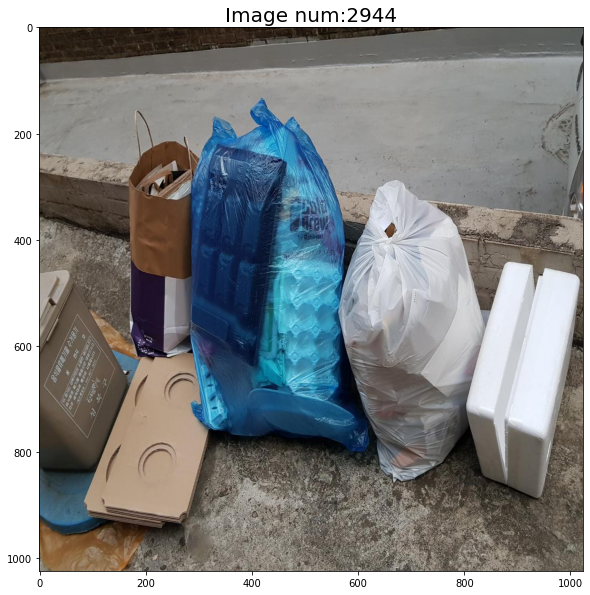

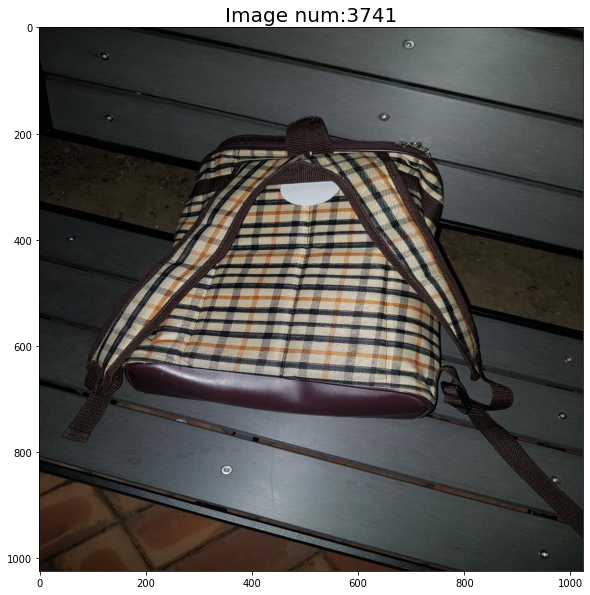

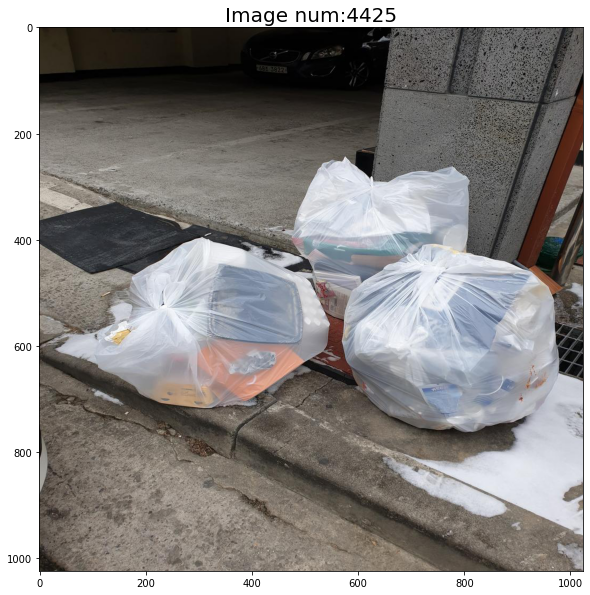

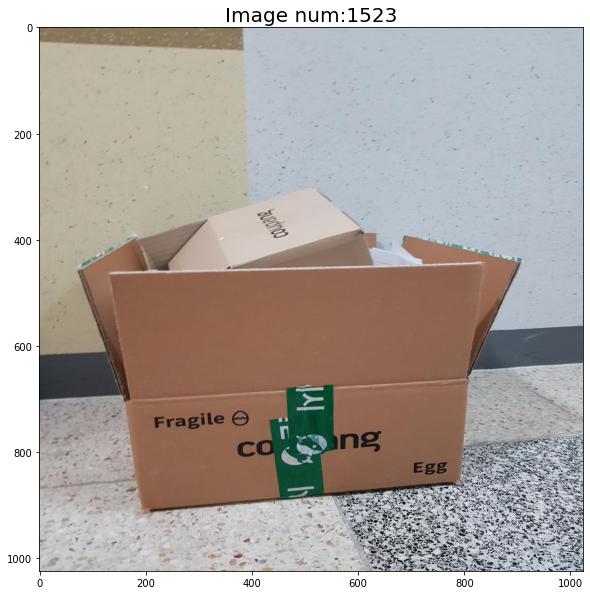

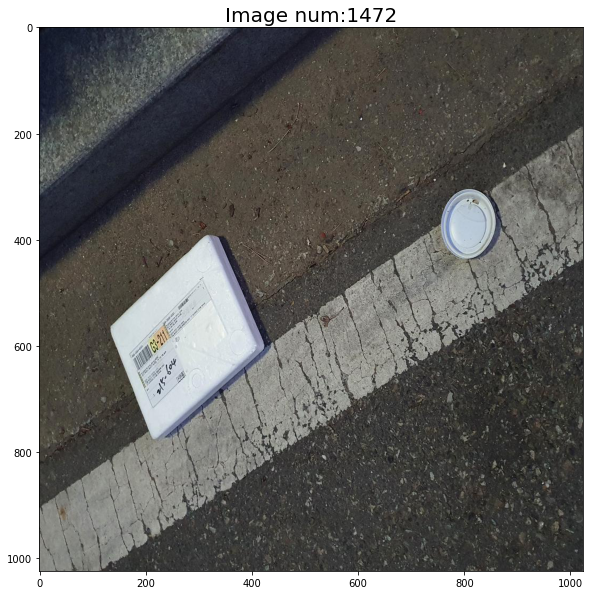

In [4]:
def show_img(idx):
    img = io.imread(os.path.join('../detection/dataset',images[idx]['file_name']))
    plt.figure(figsize=(10,10))
    plt.title(f"Image num:{idx}",fontsize=20)
    plt.imshow(img)



for i in range(5):
    idx = random.randint(0,len(images)-1)
    show_img(idx)

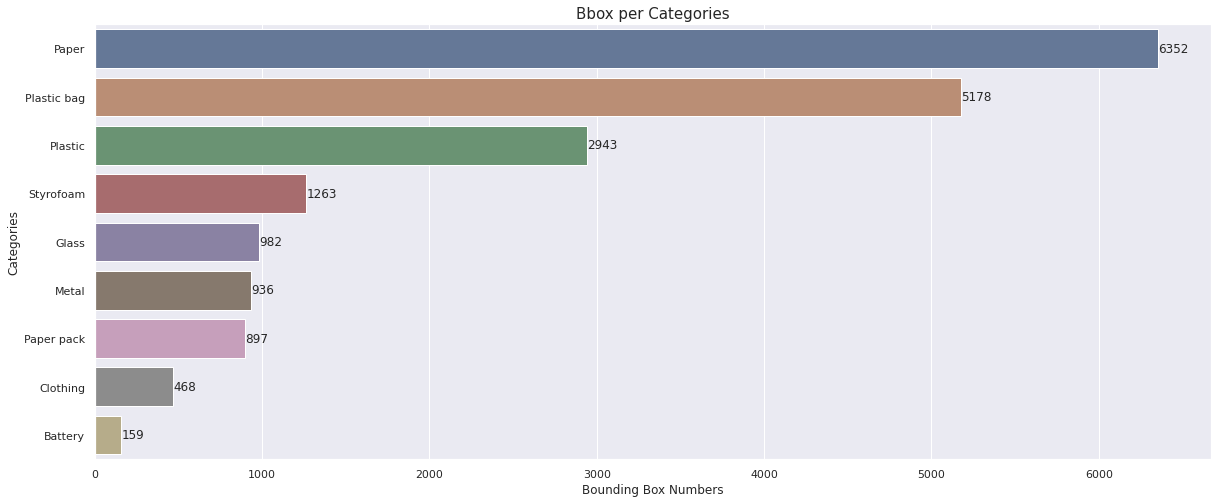

In [5]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})

box = np.zeros(len(categories_names),dtype=int)

for annotation in annotations:
    box[annotation['category_id']] += 1

df = pd.DataFrame({'Categories': categories_names[1:],\
                   'Bounding Box Numbers': box[1:]})
df = df.sort_values(by='Bounding Box Numbers',axis = 0, ascending=False)

bar_plot = sns.barplot(x='Bounding Box Numbers',y='Categories',data=df,label='Total',saturation=.5)
bar_plot.set_title('Bbox per Categories',fontsize=15)

li = []
for i in df['Bounding Box Numbers']:
    li.append(i)

for index,bar in enumerate(bar_plot.patches):
    x,y,w,h = bar.get_bbox().bounds
    bar_plot.text(w+1,y+h/2,li[index],va='center')


In [7]:
df

,Categories,Bounding Box Numbers
0,Paper,6352
6,Plastic bag,5178
4,Plastic,2943
5,Styrofoam,1263
3,Glass,982
2,Metal,936
1,Paper pack,897
8,Clothing,468
7,Battery,159


In [9]:
box = np.zeros(len(image_nums),dtype=int)

for annotation in annotations:
    box[annotation['image_id']] += 1

image_df = pd.DataFrame({'Images': image_nums[1:],\
                   'Bounding Box Numbers': box[1:]})


image_df = image_df.sort_values(by='Bounding Box Numbers',axis = 0, ascending=False)

image_df




,Images,Bounding Box Numbers
4196,4197,71
945,946,55
4046,4047,52
393,394,48
2980,2981,46
...,...,...
3414,3415,1
3412,3413,1
2214,2215,1
3410,3411,1
